# Short-time FFT & Windowing

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
#%matplotlib inline

In [10]:
# Parámetro STFT

L = 64
M = 128
N = L*M

# Señal Chirp
B = 50
fs = 1000

n = np.arange(N)
t = n / fs

phase = np.pi * B * t**2

x = np.cos(phase)
#x = (N-n)/N * np.cos(phase)

(0.0, 1023.0)

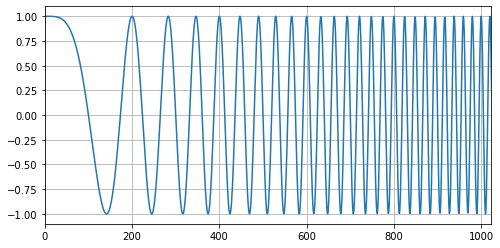

In [11]:
fig, ax = plt.subplots(figsize=[8,4])
ax.plot(n,x)
ax.grid('on')
ax.set_xlim([0,N/8-1])

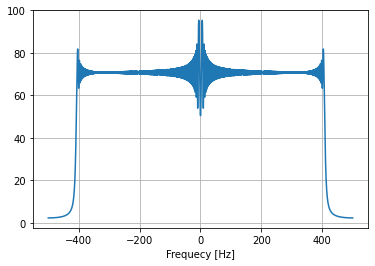

In [12]:
Xk = np.fft.fft(x)
Xk = np.fft.fftshift(Xk)
f = (np.arange(N)-N/2)*fs/N

fig = plt.figure()
plt.plot(f,np.abs(Xk))
plt.grid('on')
plt.xlabel('Frequecy [Hz]');

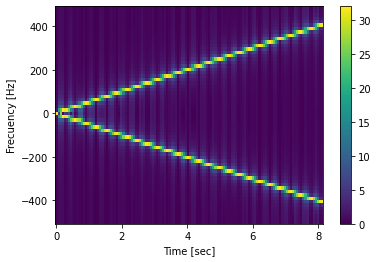

In [13]:
Xstft = np.zeros([M,L],np.cdouble)
for m in range(M):
    xm = x[m*L:(m+1)*L]
    Xstft[m,:] = np.fft.fft(xm)

Xstft = np.fft.fftshift(Xstft,axes=1)
fk = (np.arange(L) - L/2) * fs / L
tm = np.arange(M) * L / fs
fig = plt.figure()
c = plt.pcolormesh(tm,fk,np.abs(Xstft.T),shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,32])
plt.colorbar(c)


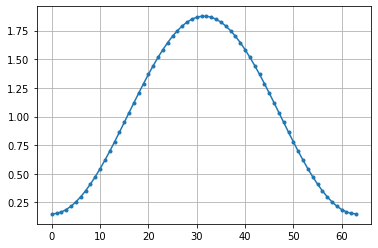

In [14]:
# Windowing
w = np.hamming(L)
w = w / np.mean(w)
Xstftw = np.zeros([M,L],np.cdouble)
for m in range(M):
    xm = w*x[m*L:(m+1)*L]
    Xstftw[m,:] = np.fft.fft(xm)

fig = plt.figure()
plt.plot(w,'.-')
plt.grid('on')

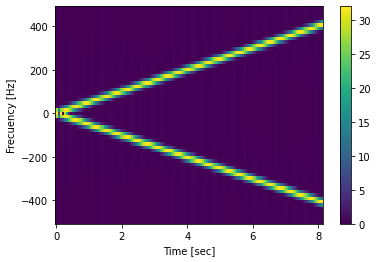

In [15]:
Xstftw = np.fft.fftshift(Xstftw,axes=1)
fig = plt.figure()
c = plt.pcolormesh(tm,fk,np.abs(Xstftw.T),shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,32])
plt.colorbar(c)

(100.0, 300.0)

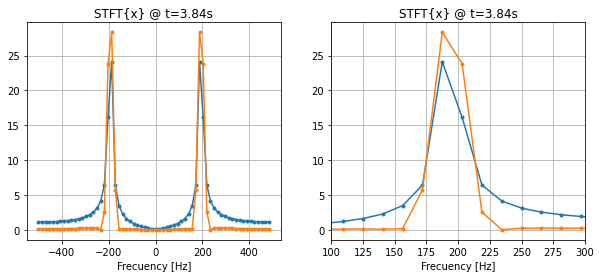

In [16]:
# Comparando espectros
m = 60
fig, ax = plt.subplots(1,2,figsize=[10,4])
ax[0].plot(fk,np.abs(Xstft[m,:]),'.-')
ax[0].plot(fk,np.abs(Xstftw[m,:]),'.-')
ax[0].set_xlabel('Frecuency [Hz]')
ax[0].set_title('STFT{x} @ t='+str(tm[m])+'s')
ax[0].grid('on')

ax[1].plot(fk,np.abs(Xstft[m,:]),'.-')
ax[1].plot(fk,np.abs(Xstftw[m,:]),'.-')
ax[1].grid('on')
ax[1].set_xlabel('Frecuency [Hz]')
ax[1].set_title('STFT{x} @ t='+str(tm[m])+'s')
ax[1].set_xlim([100,300])